# Complete Case Analysis

Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists of discarding observations with missing data in any variable.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

C:\ProgramData\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load data

In [3]:
data = pd.read_csv("credit_approval_uci.csv")

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


## Check proportion of missing data

In [4]:
# Let's inspect the proportion of missing
# values per variable:

data.isnull().mean().sort_values(ascending=True)

A11       0.000000
A12       0.000000
A13       0.000000
A15       0.000000
target    0.000000
A4        0.008696
A5        0.008696
A6        0.013043
A7        0.013043
A1        0.017391
A2        0.017391
A14       0.018841
A3        0.133333
A8        0.133333
A9        0.133333
A10       0.133333
dtype: float64

Text(0.5, 1.0, 'Proportion of missing data per variable')

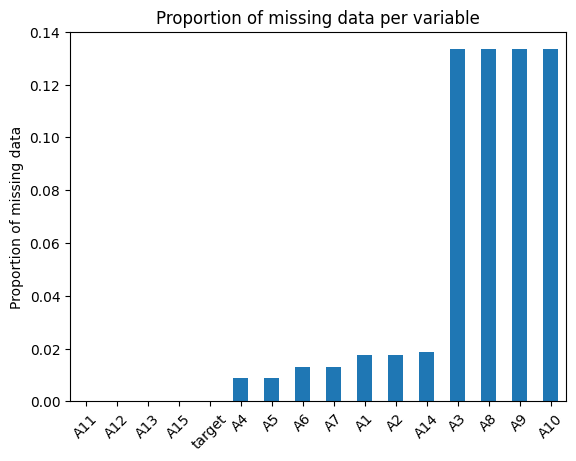

In [6]:
# Bar plot with proportion of missing data:
# with plt.style.context("seaborn"):
data.isnull().mean().sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("Proportion of missing data")
plt.title("Proportion of missing data per variable")

## Drop observations with missing data

[pd.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [7]:
# Remove observations with missing data
# in any variable:

data_cca = data.dropna()

In [8]:
print(f"Total number of observations: {len(data)}")
print(f"Number of observations without missing data {len(data_cca)}")

Total number of observations: 690
Number of observations without missing data 564


## Drop observations with missing data in specific variables

In [9]:
data_cca = data.dropna(subset=["A1", "A2", "A6", "A7", "A14"])

In [10]:
print(f"Total number of observations: {len(data)}")
print(f"Number of observations without missing data {len(data_cca)}")

Total number of observations: 690
Number of observations without missing data 653


## Feature-engine

[DropMissingData](https://feature-engine.readthedocs.io/en/latest/api_doc/imputation/DropMissingData.html)

In [12]:
pip install feature-engine

  Obtaining dependency information for feature-engine from https://files.pythonhosted.org/packages/8c/41/c5aa4fef733c48746cce4446a4af7259e47214da1afe51850928df76c45e/feature_engine-1.8.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.4.0 from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/378.6 kB ? eta -:--:--
   -------- ------------------------------- 81.9/378.6 kB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 378.6/378.6 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -----------------------------------

In [11]:
from feature_engine.imputation import DropMissingData

### Automatically find variables with missing data

In [12]:
# Set the imputer to find variables with missing data:

cca = DropMissingData(variables=None, missing_only=True)

# Find all variables with missing data:

cca.fit(data)

DropMissingData()

In [13]:
# The variables that will be considered
# for the imputation (those with NA in
# the train set):

cca.variables_

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A14']

In [14]:
# Drop observations with missing data:

data_cca = cca.transform(data)

In [15]:
print(f"Total number of observations: {len(data)}")
print(f"Number of observations without missing data {len(data_cca)}")

Total number of observations: 690
Number of observations without missing data 564


### Remove observations with missing data in specific variables

In [16]:
# Set the imputer to remove observations with
# missing data in a subset of variables:

cca = DropMissingData(variables=["A1", "A2", "A6", "A7", "A14"])

# Imputer does not learn any parameter,
# but we must fit it anyhow:

cca.fit(data)

DropMissingData(variables=['A1', 'A2', 'A6', 'A7', 'A14'])

In [17]:
# Drop observations with missing data:

data_cca = cca.transform(data)

In [18]:
print(f"Total number of observations: {len(data)}")
print(f"Number of observations without missing data {len(data_cca)}")

Total number of observations: 690
Number of observations without missing data 653
